In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from datetime import datetime
%matplotlib inline
sns.set()

In [2]:
click = pd.read_csv("clicks.csv")

In [3]:
click.head()

,tracking_id,click_id,click_datetime,CPI
0,1033522010023579020,22817403-1473191644-1641538988,2016-09-06 22:54:04,0.786682
1,1033522010023579020,22817403-1473191680-501021762,2016-09-06 22:54:40,0.786682
2,1033522010023579020,22817403-1473193873-1098301704,2016-09-06 23:31:13,0.786682
3,1033522010023579020,22817403-1473195092-622681650,2016-09-06 23:51:32,0.786682
4,1033522010023579020,22817403-1473189457-258078900,2016-09-06 22:17:37,0.786682


In [4]:
app = pd.read_csv("app_users.csv")

In [5]:
app.head()

,tracking_id,click_id,install_datetime,os_version,device_manufacturer,device_model,device_type,device_locale,revenue
0,1033522010023579020,22817403-1473193873-1098301704,2016-09-06 23:51:28,4.2.2,Lenovo,Lenovo A316i,phone,ru-RU,1.662699
1,1033522010023579020,22817403-1473195092-622681650,2016-09-07 00:11:19,5.0.2,Samsung,Galaxy A3,phone,ru-RU,1.863439
2,1033522010023579020,22817403-1473189457-258078900,2016-09-06 22:18:50,4.4.2,HTC,HTC Desire 601,phone,ru-RU,1.520538
3,1033522010023579020,22817403-1473192316-1183289285,2016-09-06 23:06:59,6.0,Huawei,CHM-U01,phone,ru-RU,1.781050
4,1033522010023579020,22817403-1473188854-1249048763,2016-09-06 22:20:11,4.4.2,Samsung,Galaxy S4 Mini,phone,ru-RU,1.669396


*Смержим таблицы*, для построения статистики

In [6]:
df = pd.merge(click, app, on=['tracking_id', 'click_id'], how='outer')

In [7]:
df.head()

,tracking_id,click_id,click_datetime,CPI,install_datetime,os_version,device_manufacturer,device_model,device_type,device_locale,revenue
0,1033522010023579020,22817403-1473191644-1641538988,2016-09-06 22:54:04,0.786682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1033522010023579020,22817403-1473191680-501021762,2016-09-06 22:54:40,0.786682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1033522010023579020,22817403-1473193873-1098301704,2016-09-06 23:31:13,0.786682,2016-09-06 23:51:28,4.2.2,Lenovo,Lenovo A316i,phone,ru-RU,1.662699
3,1033522010023579020,22817403-1473195092-622681650,2016-09-06 23:51:32,0.786682,2016-09-07 00:11:19,5.0.2,Samsung,Galaxy A3,phone,ru-RU,1.863439
4,1033522010023579020,22817403-1473189457-258078900,2016-09-06 22:17:37,0.786682,2016-09-06 22:18:50,4.4.2,HTC,HTC Desire 601,phone,ru-RU,1.520538


Мы можем считать эффективность маркетинговой кампании в зависимости от **заложенного KPI**. 

Я в своем задании постараюсь рассмотреть основные.

Для того, чтобы оценить эффективность кампании я предлагаю два способа:
1. Доверимся беспристрастной машине, и на каждой итерации будем выявлять самую лучшую кампанию, и прибавлять к ней единичку. В конце посмотрим, какая из кампаний суммарно будет лучшей;
2. Заведем табличку, в которую будем записывать значения статистики для каждой кампании по каждому срезу и потом:  
  * сравним с п.1  
  * посмотрим "глазами", постараемся выявить лучшую

In [ ]:
tablo = defaultdict(int)
for i in df.tracking_id.unique():
    tablo[i] = 0

def heartless_machine(tablo, result, function):
    for k, v in result.iteritems():
        if v == function(result.values):
            tablo[k] += 1

In [9]:
def stat_table(table, result, col_name):
    stat_table = pd.concat([table, result], axis=1)
    stat_table.columns = [i for i in stat_table.columns[:-1]] + [col_name]
    return stat_table

Оценим **revenue** каждой кампании

In [10]:
revenue = df.groupby('tracking_id')['revenue'].sum()
tmp_stat = pd.DataFrame(revenue, columns=['revenue'])
heartless_machine(tablo=tablo, result=revenue, function=max)
revenue

tracking_id
457095801521389451       988.119196
457100182639649595      1629.568463
529165038158632239       829.185564
817383831807028900       855.027816
1033522010023579020    10578.888807
1105628863007835516      123.641566
Name: revenue, dtype: float64

Компания **__....20__** с лучшей выручкой. Но идем дальше

Оценим **процент числа установок в компании от числа кликов**

In [11]:
inst_click = df.groupby('tracking_id').count().install_datetime/df.groupby('tracking_id').count().click_id * 100
tmp_stat = stat_table(table=tmp_stat, result=inst_click, col_name='inst_click')
heartless_machine(tablo=tablo, result=inst_click, function=max)
inst_click

tracking_id
457095801521389451      8.121181
457100182639649595      8.815635
529165038158632239     11.992827
817383831807028900     10.849980
1033522010023579020    13.204957
1105628863007835516    11.654676
dtype: float64

И опять, та же кампания в лидерах -- больше всего людей установило после клика

**Выручка/число установок**

In [12]:
revenue_by_install = df.groupby('tracking_id')['revenue'].sum()/df.groupby('tracking_id').count().install_datetime
tmp_stat = stat_table(table=tmp_stat, result=revenue_by_install, col_name='revenue_install')
heartless_machine(tablo=tablo, result=revenue_by_install, function=max)
revenue_by_install

tracking_id
457095801521389451     1.548776
457100182639649595     1.550493
529165038158632239     1.549880
817383831807028900     1.543372
1033522010023579020    1.548886
1105628863007835516    1.526439
dtype: float64

Распределение достаточно равномерно

**Выручка/число кликов**

In [13]:
revenue_by_clicks = df.groupby('tracking_id')['revenue'].sum()/df.groupby('tracking_id').count().click_id
tmp_stat = stat_table(table=tmp_stat, result=revenue_by_clicks, col_name='revenue_clicks')
heartless_machine(tablo=tablo, result=revenue_by_clicks, function=max)
revenue_by_clicks

tracking_id
457095801521389451     0.125779
457100182639649595     0.136686
529165038158632239     0.185874
817383831807028900     0.167456
1033522010023579020    0.204530
1105628863007835516    0.177902
dtype: float64

Тут уже достаточно интересно, есть явный лидер -- кампания **__...020__**, у нее самый высокое соотношение

Посмотрим на **CPI**.

Чем он ниже - тем лучше

In [14]:
CPI = df.groupby('tracking_id')['CPI'].mean()
tmp_stat = stat_table(table=tmp_stat, result=CPI, col_name='CPI')
## function(min) -- так как мы поощряем самый низкий
heartless_machine(tablo=tablo, result=CPI, function=min)
CPI

tracking_id
457095801521389451     0.656431
457100182639649595     0.507326
529165038158632239     0.827455
817383831807028900     0.614500
1033522010023579020    0.786682
1105628863007835516    0.652313
Name: CPI, dtype: float64

Теперь посмотрим на статистики времени между **кликом и установкой**

In [15]:
def diff_time(x, y):
    fmt = "%Y-%m-%d %H:%M:%S"
    if isinstance(y, str):
        click = datetime.strptime(x, fmt)
        install = datetime.strptime(y, fmt)
        return install - click

In [16]:
df['diff'] = df.apply(lambda x: diff_time(x['click_datetime'], x['install_datetime']), axis=1)

**Максимальное время** между установкой и кликом

In [17]:
max_time = df.groupby('tracking_id')['diff'].max()
tmp_stat = stat_table(table=tmp_stat, result=max_time, col_name='max_time')
## function(min) -- так как мы поощряем меньшее время
heartless_machine(tablo=tablo, result=max_time, function=min)
max_time

tracking_id
457095801521389451    9 days 02:39:49
457100182639649595    6 days 12:33:02
529165038158632239    2 days 19:12:59
817383831807028900    7 days 14:17:12
1033522010023579020   9 days 23:09:39
1105628863007835516   2 days 00:36:36
Name: diff, dtype: timedelta64[ns]

**Минимальное время** между кликом и установкой

In [18]:
min_time = df.groupby('tracking_id')['diff'].min()
tmp_stat = stat_table(table=tmp_stat, result=min_time, col_name='min_time')
## function(min) -- так как мы поощряем меньшее время
heartless_machine(tablo=tablo, result=min_time, function=min)
min_time

tracking_id
457095801521389451    -6 days +08:13:46
457100182639649595      0 days 00:00:01
529165038158632239      0 days 00:00:08
817383831807028900      0 days 00:00:05
1033522010023579020   -2 days +13:05:48
1105628863007835516     0 days 00:00:04
Name: diff, dtype: timedelta64[ns]

~~Упс, выбросы.~~ 

Возьмем **медиану**

In [19]:
median_time = df.groupby('tracking_id')['diff'].apply(lambda x: str(x.median()).split('.')[0])
tmp_stat = stat_table(table=tmp_stat, result=median_time, col_name='median_time')
## function(min) -- так как мы поощряем меньшее время
heartless_machine(tablo=tablo, result=median_time, function=min)
median_time

tracking_id
457095801521389451     0 days 00:02:45
457100182639649595     0 days 00:03:08
529165038158632239     0 days 00:02:22
817383831807028900     0 days 00:03:07
1033522010023579020    0 days 00:03:04
1105628863007835516    0 days 00:02:02
Name: diff, dtype: object

В принципе, выглядит убедительно, но возьмем **3 квартиль**

In [20]:
quan_time = df.groupby('tracking_id')['diff'].apply(lambda x: str(x.quantile(.75)).split('.')[0])
tmp_stat = stat_table(table=tmp_stat, result=quan_time, col_name='quan_time')
## function(min) -- так как мы поощряем меньшее время
heartless_machine(tablo=tablo, result=quan_time, function=min)
quan_time

tracking_id
457095801521389451     0 days 00:20:31
457100182639649595     0 days 00:22:53
529165038158632239     0 days 00:10:17
817383831807028900     0 days 00:20:56
1033522010023579020    0 days 00:21:18
1105628863007835516    0 days 00:17:40
Name: diff, dtype: object

Очень выделяется 3 кампания, тратится почти в 2 раза меньше времени на установку приложения, выглядит любопытно

Посмотрим на распределение разных типов устройств по кампаниям, для этого посчитаем **процент планшетов от общего числа устройств**. 

Это влияет мало на что, но опять же, все зависит от KPI и целей кампании

In [21]:
tablet_in_campaign = df.groupby('tracking_id')['device_type'].value_counts().unstack(level=1).apply(lambda x: float(x['tablet'])/sum(x), axis=1) * 100 
tmp_stat = stat_table(table=tmp_stat, result=tablet_in_campaign, col_name='tablet_in_campaign')
heartless_machine(tablo=tablo, result=tablet_in_campaign, function=max)
tablet_in_campaign

tracking_id
457095801521389451      6.426332
457100182639649595      8.087536
529165038158632239     14.392523
817383831807028900      8.844765
1033522010023579020     9.926794
1105628863007835516    12.345679
dtype: float64

У кампании **...239** самое высокое относительное число планшетов среди всех устройств. 
Может быть полезно

Посмотрим на выручку в кампании в разрезе стран

In [22]:
df.groupby('device_locale')['revenue'].sum().sort_values(ascending=False)

device_locale
ru-RU    14471.429766
uk-UA      350.041001
ru-UA       38.494243
ru-BY       36.487851
ru-KZ       36.468879
en-US       29.709977
en-GB       13.368541
kk-KZ        6.320937
ru           5.693657
de-DE        3.007240
lv-LV        2.714803
ru-US        1.930816
et-EE        1.899128
en-NZ        1.703918
bg-BG        1.387474
ru-AM        1.358674
ru-GB        1.299618
en-SG        1.114890
Name: revenue, dtype: float64

Ожидаемо, пользователи из **России** принесли максимальный доход, далее идут страны **СНГ**, неплохо проявляют себя пользователи из **США** и **Великобритании**

Построим график **суммы заработанных средств в каждой кампании в каждой стране**.

Прологарифмируем ось revenue для наглядности

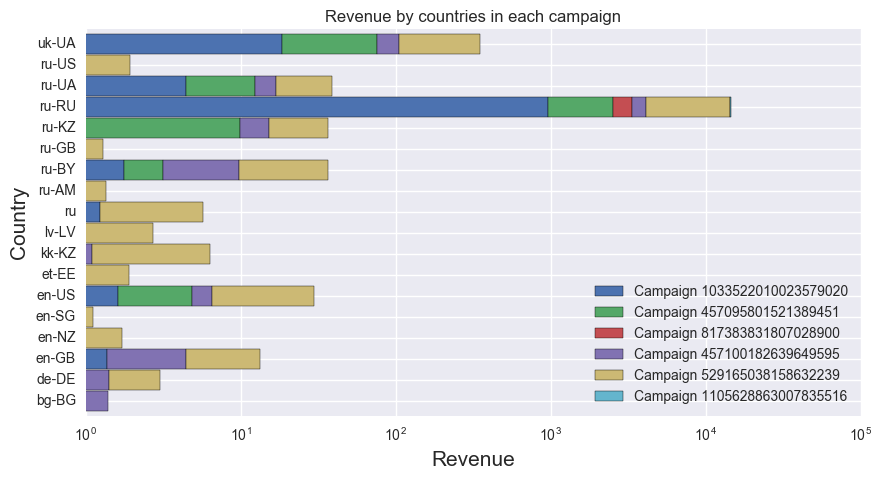

In [23]:
pd.DataFrame(df.groupby(['tracking_id', 'device_locale'])['revenue'].sum()).unstack(level=0).plot(
                        kind='barh', 
                        logx=True,
                        stacked=True,
                        title='Revenue by countries in each campaign', 
                        grid=True, 
                        figsize=(10, 5),
                        width=0.95)
fontsize = 15
plt.ylabel('Country', fontsize=fontsize)
plt.xlabel('Revenue', fontsize=fontsize)
plt.legend(["Campaign {}".format(i) for i in df.tracking_id.unique()], loc='lower right');

Посмотрим на **распределение марок телефонов в кампании**, хотя эта информация не особо полезна, так как все кампании велись для *android-девайсов*, но в в случае разных ОС можно было бы делать определенные выводы. 

Тут же самые популярные марки во всех кампаниях - **Samsung и Lenovo**

In [24]:
df.groupby('tracking_id')['device_manufacturer'].apply(lambda x: Counter(x).most_common(4)).values

array([[(nan, 7218), ('Samsung', 266), ('Lenovo', 73), ('LG', 39)],
       [(nan, 10871), ('Samsung', 491), ('Lenovo', 104), ('LG', 80)],
       [(nan, 3926), ('Samsung', 144), ('Lenovo', 70), ('Zte', 32)],
       [(nan, 4552), ('Samsung', 213), ('Lenovo', 70), ('LG', 52)],
       [(nan, 44893), ('Samsung', 2761), ('Lenovo', 713), ('LG', 411)],
       [(nan, 614), ('Samsung', 26), ('Lenovo', 6), ('Alcatel', 6)]], dtype=object)

**Итак, подведем итоги:**

Бездушная машина в нашем неофициальном зачете так распределила голоса:

In [25]:
tablo

defaultdict(int,
            {457095801521389451: 1,
             457100182639649595: 2,
             529165038158632239: 2,
             817383831807028900: 0,
             1033522010023579020: 3,
             1105628863007835516: 2})

Посмотрим на статистику по каждому срезу, которую мы так скурпулезно собирали

In [26]:
tmp_stat

,revenue,inst_click,revenue_install,revenue_clicks,CPI,max_time,min_time,median_time,quan_time,tablet_in_campaign
tracking_id,,,,,,,,,,
457095801521389451,988.119196,8.121181,1.548776,0.125779,0.656431,9 days 02:39:49,-6 days +08:13:46,0 days 00:02:45,0 days 00:20:31,6.426332
457100182639649595,1629.568463,8.815635,1.550493,0.136686,0.507326,6 days 12:33:02,0 days 00:00:01,0 days 00:03:08,0 days 00:22:53,8.087536
529165038158632239,829.185564,11.992827,1.549880,0.185874,0.827455,2 days 19:12:59,0 days 00:00:08,0 days 00:02:22,0 days 00:10:17,14.392523
817383831807028900,855.027816,10.849980,1.543372,0.167456,0.614500,7 days 14:17:12,0 days 00:00:05,0 days 00:03:07,0 days 00:20:56,8.844765
1033522010023579020,10578.888807,13.204957,1.548886,0.204530,0.786682,9 days 23:09:39,-2 days +13:05:48,0 days 00:03:04,0 days 00:21:18,9.926794
1105628863007835516,123.641566,11.654676,1.526439,0.177902,0.652313,2 days 00:36:36,0 days 00:00:04,0 days 00:02:02,0 days 00:17:40,12.345679


По совокупности, **победила кампания ...20**, так как:
- наибольшая выручка;
- большИй процент установивших после клика;
- не самый высокий CPI;
- приемлимые медиана и квантиль времени между кликом и установкой;
- относительно высокий процент планшетов (считаем, что это важно)

Но есть 3 претендента на второе место -- **...595, ...516 и ...239**

- **...595** - больше выручка, ниже CPI (что может быть важно), но меньший процент людей ее устанавливает после клика;

- **...516** - меньше всего выручки, но достаточно высокий процент установок;

- **...239** кампания, которая выделялась самым малым квантилем времени между кликой и установкой, выделяется самым высоким процентом планшетов в кампании, самым высоким CPI, но, в целом, выглядит очень неплохо

Самой худшей же я бы назвал кампанию **...451** с невысоким revenue, самым низким процентом установок, и не самым низким CPI.